# CA 2, Interactive Learning, Fall 2024
- **Name**: Majid Faridfar
- **Student ID**: 810199569

## Problem 1
What is the difference between reinforcement learning and supervised learning? Explain by providing two similar problems: one that requires reinforcement learning to solve, and another that can be solved with supervised learning.

Differences:
- How to learn? 
  - RL is based on an agent interacting with an environment. The agent takes actions, receives feedback in the form of rewards or penalties, and aims to maximize the cumulative reward over time. The feedback is sparse and often delayed, and there’s no explicit label or correct answer for each action.
  - SL involves learning from labeled data where each input comes with a corresponding correct output (label). The model is trained to map inputs to outputs based on this labeled dataset.

- What is the goal?
  - The goal of RL is to learn a strategy (or policy) that will maximize the total reward over time. The agent learns through trial and error, exploring and exploiting the environment to improve its decisions.
  - The goal of SL is to minimize the error between the predicted output and the true label, thereby learning a mapping function from inputs to outputs.

Illustration (Maze):
- A robot (agent) is placed in a maze (environment) and has to navigate from the start to the goal. The robot takes actions such as moving left, right, up, or down. Initially, it doesn’t know the best path to take and receives feedback in the form of rewards (e.g., +1 for reaching the goal, -1 for hitting a wall or making a wrong turn). The goal is to maximize the cumulative reward by learning which actions lead to the goal. The robot learns over time by exploring different paths, receiving feedback, and adjusting its strategy based on the rewards it receives.
- Instead of having the robot learn by exploring the maze, you collect a dataset of maze configurations (states) and the correct sequence of moves (labels) that leads to the goal. For each configuration, you have a label indicating the correct next action (e.g., move left, move right, etc.). You train a model on this labeled dataset to predict the correct action for a given maze state. Once trained, the model can predict the correct move for any new maze configuration.

## Problem 2
In an MDP problem, if the reward function undergoes a linear transformation, does the optimal policy change? (Provide a mathematical proof or a counterexample, and ignore the trivial case of multiplying by zero.) Does the answer to this question depend on whether the task is continuing or episodic?

A general linear transformation of a reward function $R(s, a)$ is:

$$R'(s, a) = \alpha R(s, a) + \beta$$
where $\alpha > 0$ and $\beta$ is a scalar.

Here, we will show that when the reward function undergoes a linear transformation like this, the optimal policy does **not** change. This conclusion holds for both continuing and episodic tasks.

### Understanding Optimal Policies:

The goal in an MDP is to find an optimal policy $\pi^*$ that maximizes the **expected cumulative reward**. Depending on whether the problem is episodic or continuing, this objective is either the total expected reward (episodic task) or the expected discounted cumulative reward (continuing task). We’ll focus on the discounted scenario, as the principles generalize well.

In a discounted setting, the objective is to maximize the expected return,

$$G_t = \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k R(s_{t+k}, a_{t+k}) | s_t = s, a_t = a \right]$$
where $\gamma$ is the discount factor such that $0 \leq \gamma \leq 1$ (if $\gamma$ is equal to $1$, then we are calculating the expected cumulative reward).

We define the value function $V^\pi(s)$ under a policy $\pi$ as:

$$V^\pi(s) = \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k R(s_{t+k}, a_{t+k}) \middle| s_t = s \right]$$

Similarly, the action-value function or Q-value function $Q^\pi(s, a)$ is:

$$Q^\pi(s, a) = \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k R(s_{t+k}, a_{t+k}) \middle| s_t = s, a_t = a \right]$$

The optimal policy is the one that maximizes the value or Q-value function, satisfying:

$$\pi^*(s) = \arg\max_a Q^*(s, a)$$

#### Effect on the Value Function:

With the new transformed reward function $R'(s, a) = \alpha R(s, a) + \beta$, the new value function $V'^\pi(s)$ under policy $\pi$ becomes:

$$V'^\pi(s) = \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k R'(s_{t+k}, a_{t+k}) \middle| s_t = s \right]
         = \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k (\alpha R(s_{t+k}, a_{t+k}) + \beta) \middle| s_t = s \right]$$

This expands into:

$$V'^\pi(s) = \alpha \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k R(s_{t+k}, a_{t+k}) \middle| s_t = s \right]
         + \beta \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k \middle| s_t = s \right]$$

Shortening the notation, we have:

$$V'^\pi(s) = \alpha V^\pi(s) + \beta \frac{1}{1 - \gamma}$$

where the sum $\sum_{k=0}^{\infty} \gamma^k = \frac{1}{1-\gamma}$ because it is a geometric series.

#### Effect on the Q-Value Function:

Similarly, the transformed Q-value function would be:

$$Q'^\pi(s, a) = \alpha Q^\pi(s, a) + \beta \frac{1}{1 - \gamma}$$

### Does the Optimal Policy Change?

Answer is no. The optimal policy $\pi^*(s)$ is determined by selecting the action $a$ that maximizes the Q-value function:

$$\pi^*(s) = \arg\max_a Q^*(s, a)$$

When applying the linear transformation, the transformed Q-value function satisfies:

$$Q'^\pi(s, a) = \alpha Q^\pi(s, a) + \beta \frac{1}{1 - \gamma}$$

Since $\alpha > 0$, this transformation preserves the order of the Q-values. That is, if action $a_1$ was better than action $a_2$ before the transformation (i.e., $Q^*(s, a_1) > Q^*(s, a_2)$), it will remain better after the transformation because the transformation is a positive linear scaling and a constant shift, both of which do not affect the relative ordering of numbers:

$$Q'^\pi(s, a_1) = \alpha Q^\pi(s, a_1) + \beta \frac{1}{1 - \gamma}$$
$$Q'^\pi(s, a_2) = \alpha Q^\pi(s, a_2) + \beta \frac{1}{1 - \gamma}$$

Thus, $Q^\pi(s, a_1) > Q^\pi(s, a_2) \Rightarrow Q'^\pi(s, a_1) > Q'^\pi(s, a_2)$.

Since the relative rankings of the Q-values are preserved, the optimal action $\arg\max_a Q^*(s, a)$ does not change. Therefore, the optimal policy remains the same.

The answer does not depend on whether the task is continuing or episodic. In an episodic task, you would also be maximizing the expected return, but limited to a certain number of steps before the episode ends. The reasoning around the transformation of the reward function and its impact on the Q-value functions still holds because the transformation is applied uniformly across the rewards, and the policy that maximizes value remains unchanged.

## Problem 3
Assume a robot operates in a grid environment as follows. In each episode, the robot starts in one of the cells in the bottom row (with an equal probability of starting in each cell). The robot can move left, right, or up. If the robot chooses to move in a direction where there is a wall, it remains in place. If the robot enters one of the green cells, the episode ends.

![pics/P3.png](pics/P3.png)

### Scenario 1

The robot knows the grid environment completely and is aware of its current location at any moment, using this information to make decisions. The goal is for the robot to reach the second row and enter one of the green cells. If the robot enters a green cell, it receives a reward of +1 (and the episode ends), and if it moves from one blue cell to another blue cell, it receives a reward of 0. For this task, $\lambda = 0.9$.

#### a
Can the defined task be represented by an MDP? If not, explain why; if yes, fully specify the MDP.

Yes, this task can be defined by an MDP. To fully specify the Markov Decision Process (MDP) for this task, we need to define **States (S)**, **Actions (A)**, **Transition probabilities (P(s'|s,a))**, **Rewards (R(s,a))**, and **Discount Factor (λ)**.

##### States (S):
The states are the cells in the grid:
- S1, S2, S3, S4, S5, S6, S7 represent the blue cells.
- T1, T3, and T5 are the green terminal cells (absorbing states).

So the state space is:
$$S = \{S1, S2, S3, S4, S5, S6, S7, T1, T3, T5\}$$

##### Actions (A):
The robot has three possible actions in the bottom row: **Up (U)**, **Left (L)**, **Right (R)**. However, when the robot is in the terminal green cells T1, T3, T5, the episode ends, and no further actions are available.

Thus, the action set is:
$$A = \{\text{Up}, \text{Left}, \text{Right}\}$$

##### Transition Probabilities (P(s' | s, a)):
The robot transitions deterministically (we assume that there is no stochastic behavior, since it is not mentioned in the problem), so the probability of transitioning from one state to another depends on whether the robot encounters a wall.

- Moving "Left" in state S1 will not change the state.
- Moving "Up" in states S2, S4, S6 will move the robot into the green cells (and stop the episode), while in other states will not change the state.
- Moving "Right" in state S7 will not change the state.

Here are the key deterministic transitions:

- **Up movement**:
  - $P(T1 | S2, U) = 1$
  - $P(T3 | S4, U) = 1$
  - $P(T5 | S6, U) = 1$
  - Other cases: The robot stays in the current state if "Up" is attempted from a cell without a green terminal cell above it.

- **Left movement**:
  - $P(S1 | S2, L) = 1$
  - $P(S2 | S3, L) = 1$
  - $P(S3 | S4, L) = 1$
  - $P(S4 | S5, L) = 1$
  - $P(S5 | S6, L) = 1$
  - $P(S6 | S7, L) = 1$
  - Other cases: The robot stays in the current state if "Left" is attempted from  S1.

- **Right movement**:
  - $P(S2 | S1, R) = 1$
  - $P(S3 | S2, R) = 1$
  - $P(S4 | S3, R) = 1$
  - $P(S5 | S4, R) = 1$
  - $P(S6 | S5, R) = 1$
  - $P(S7 | S6, R) = 1$
  - Other cases: The robot stays in the current state if "Right" is attempted from  S7.

##### Rewards (R(s,a)):
The robot receives:
- A reward of **+1** upon entering a terminal green cell (T1, T3, T5).
- A reward of **0** for any movement from one blue cell to another blue cell.

Thus, the rewards are:
- $R(s' | s, U) = 1$ if the robot moves from S2 to T1, S4 to T3, or S6 to T5.
- $R(s' | s, a) = 0$ for any other movement.

For example:
- $R(T1 | S2, U) = 1$,
- $R(T3 | S4, U) = 1$,
- $R(T5 | S6, U) = 1$,
- $R(S2 | S3, L) = 0$,
- $R(S6 | S5, R) = 0$, etc.

##### Discount Factor $λ$:
The **discount factor** is $λ = 0.9$. This means that rewards received in future states are weighted by a factor of 0.9 for every step into the future. It reflects the agent's preference for immediate rewards over delayed ones.

#### b
How many optimal deterministic policies exist for solving this task? Appropriately express $\pi(s)$ for each.

To define the optimal policy, we go state by state and analyze the optimal actions:

1. **S1**: The only possible optimal action here is to move **right**, since other actions are blocked by a wall. Thus, for $\pi(S1)$:
$$\pi(S1) = \text{R}$$
- Hence, there’s only **one optimal action** in S1.

2. **S2**: The optimal way to immediately end the episode and earn a reward is to move **Up** into the green terminal state T1. Thus:
$$\pi(S2) = \text{U}$$
- Hence, there’s only **one optimal action** in S2.

3. **S3**: Moving **Up** is not blocked by the above wall. From S3, the robot can either move **left** to S2, letting it access the green cell T1, or move **right** to S4, potentially heading toward T3. Since rewards are the same (all terminal cells give +1 and actions cost 0), **both left and right are equally optimal** choices. Therefore:
$$\pi(S3) = \text{L or R}$$
- Hence, there are **two optimal actions** in S3.

4. **S4**: The optimal action in state S4 is to move **Up** into T3 immediately to end the episode. Thus:
$$\pi(S4) = \text{U}$$
- Hence, there’s only **one optimal action** in S4.

5. **S5**: Robot can move **right** toward S6 to reach the green terminal T5, or **left** to S4 and reach T3. Since both terminal cells T3 and T5 give the same reward, either direction is optimal. Therefore:
$$\pi(S5) = \text{L or R}$$
- Hence, there are **two optimal choices** in S5.

6. **S6**: The optimal action is to go **Up** to T5 immediately. Thus:
$$\pi(S6) = \text{U}$$
- Hence, there’s only **one optimal action** in S6.

7. **S7**: Since S7 has no option but to move **left** (right and up are blocked by a wall), the optimal policy is:
$$\pi(S7) = \text{L}$$
- Hence, there’s only **one optimal action** in S7.

---

- In **S1, S2, S4, S6, S7**, the robot has only **one optimal action**.
- In **S3, S5**, the robot has **two optimal choices**: move left or right.

Therefore, the total number of **optimal deterministic policies** is:

$$\text{Total optimal policies} = 2 \times 2 = 4$$

---

![pics/P3S1b.png](pics/P3S1b.png)

1. **Policy 1**:
$$\pi(S1) = \text{R}, \quad \pi(S2) = \text{U}, \quad \pi(S3) = \text{L}, \quad \pi(S4) = \text{U}, \quad \pi(S5) = \text{L}, \quad \pi(S6) = \text{U}, \quad \pi(S7) = \text{L}$$
   
2. **Policy 2**:
$$\pi(S1) = \text{R}, \quad \pi(S2) = \text{U}, \quad \pi(S3) = \text{L}, \quad \pi(S4) = \text{U}, \quad \pi(S5) = \text{R}, \quad \pi(S6) = \text{U}, \quad \pi(S7) = \text{L}$$

3. **Policy 3**:
$$\pi(S1) = \text{R}, \quad \pi(S2) = \text{U}, \quad \pi(S3) = \text{R}, \quad \pi(S4) = \text{U}, \quad \pi(S5) = \text{L}, \quad \pi(S6) = \text{U}, \quad \pi(S7) = \text{L}$$

4. **Policy 4**:
$$\pi(S1) = \text{R}, \quad \pi(S2) = \text{U}, \quad \pi(S3) = \text{R}, \quad \pi(S4) = \text{U}, \quad \pi(S5) = \text{R}, \quad \pi(S6) = \text{U}, \quad \pi(S7) = \text{L}$$

### Scenario 2

The robot has no knowledge of the environment it's in. It has distance sensors on all four sides that tell it whether or not there is a wall next to it. For example, consider the images below.

![pics/P3S2.png](pics/P3S2.png)

Assume the objective is similar to the first scenario. In terms of key elements of an MDP, what has changed here? Can this problem still be represented by an MDP in a way that ultimately fulfills our objective? (Is the optimal policy what we want it to be?)

Yes, the problem can still be represented by a **Markov Decision Process (MDP)**, as it fundamentally satisfies the requirements for an MDP. But there are key changes because the robot no longer knows exactly where it is within the environment.

#### State Space (S)
In general, states in this MDP are based on the robot’s sensory input: `{right, up, left, down}`. Each direction can either be blocked (0) or unblocked (1), thus defining the state space. Each state represents the robot’s local sensory information and position within the context of the grid. To simplify, we can define states $S_1, S_2, S_3, ...$ based on these sensory inputs.

- **$S_1$**: Sensor reading `{right: 1, up: 0, left: 0, down: 0}`.
- **$S_2$**: Sensor reading `{right: 0, up: 0, left: 1, down: 0}`.
- **$S_3$**: Sensor reading `{right: 1, up: 0, left: 1, down: 0}`.
- **$S_4$** (Ambiguous state): Sensor reading `{right: 1, up: 1, left: 1, down: 0}`.
- **$S_5$** (terminal state): Sensor reading `{right: 0, up: 0, left: 0, down: 1}`. In can be either green or red.

Thus, the **finite state space $S$** is:
$$S = \{ S_1, S_2, S_3, S_4, S_5 \}$$

#### Action Space (A)
We define actions based on directional movements:
- **$A_1$**: **Move Up**. The robot tries to move to a cell directly above in this action.
- **$A_2$**: **Move Right**. The robot moves to the neighboring cell to the right.
- **$A_3$**: **Move Left**. The robot moves to the neighboring cell to the left.
  
Thus, the **action space $A$** is:
$$A = \{ A_1, A_2, A_3 \} = \{ \text{Up}, \text{Right}, \text{Left} \}$$

#### Transition Function (P(s', s, a))
Using states $S_1 \ldots S_5$ and actions $A_1, A_2, A_3$, consider each transition:

| State Transition        | Action: Up | Action: Right | Action: Left |
|-------------------------|------------------------|-----------------------------|----------------------------|
| **$S_1$ → $S_1$** | 1 (blocked)            | 0                            | 1 (blocked)                  |
| **$S_1$ → $S_4$** | 0                      | 1                            | 0                            |
| **$S_2$ → $S_2$** | 1 (blocked)            | 1 (blocked)                  | 0                            |
| **$S_2$ → $S_4$** | 0                      | 0                            | 1                            |
| **$S_3$ → $S_3$** | 1 (blocked)            | 0                            | 0                            |
| **$S_3$ → $S_4$** | 0                      | 1                            | 1                            |
| **$S_4$ → $S_3$** | 0                      | $\frac{2}{3}$ (probabilistic)| $\frac{2}{3}$ (probabilistic)|
| **$S_4$ → $S_2$** | 0                      | $\frac{1}{3}$ (probabilistic)| 0                            |
| **$S_4$ → $S_1$** | 0                      | 0                            | $\frac{1}{3}$ (probabilistic)|
| **$S_4$ → $S_5$** | 1 (terminal)           | 0                            | 0                            |

Above:
- **Blocked transitions** (e.g., "Up" when no upward movement is possible) have a **probability of 1** for staying in the same state.
- Probabilistic transitions from $S_4$ to $S_1$, $S_2$, or $S_3$ when moving left or right.
- Moving **up** from $S_4$ always leads to the terminal state $S_5$ with probability **1**.

#### Reward Function (R(s, a))
The reward structure also changes slightly. Instead of rewards depending on grid positions, the **reward is now a function of the sensor state** and the action taken:

- If the robot takes the **Up** action in a sensor state where **Up is allowed** (i.e., there's no wall above), and this move leads to a terminal green cell, the robot gets a reward of **+1**.
- For all other valid moves (where no immediate green state is reached), the robot receives **0 reward**.
- If the robot tries an invalid action (e.g., moving into a wall), it stays in the same state and still receives a reward of **0**.
  
So, the reward function can be expressed as:

$$R(s' | s, a) = 
     \begin{cases}
       +1 & \text{If s = \{right: 1, up: 1, left: 1, down: 0\}, and a is \text{Up}} \\
       0 & \text{Otherwise}
     \end{cases}$$

#### Discount Factor (λ)
The problem didn't change the discount factor, so $\lambda$ remains at 0.9, meaning that future rewards are discounted slightly but still carry weight.

---

The optimal policy in the original problem was to **quickly reach the green terminal cells** by moving up when possible (if there was no wall above) and moving horizontally if necessary.

In this new formulation, the **optimal policy would still aim to achieve the same goal**—the robot must use its sensor readings to figure out:
- When it's best to move **Up** into a terminal cell,
- How to move **Left** or **Right** to position itself below a terminal (green) cell if it's not already there.

Thus, **in the optimal policy**, the robot will:
- Move **Up** when its sensors indicate that moving up is allowed (i.e., in a sensor state like `{right: 1, up: 1, left: 1, down: 0}`).
- Move **Left** or **Right** when needed to position itself for optimal transitions.

Thus, the optimal policy will likely involve:
$$
\pi(s) = \begin{cases} 
\text{Up} & \text{If s = \{right: 1, up: 1, left: 1, down: 0\}} \\
\text{Right/Left} & \text{If s = \{right: 1, up: 0, left: 1, down: 0\}} \\
\text{Right} & \text{If s = \{right: 1, up: 0, left: 0, down: 0\}} \\
\text{Left} & \text{If s = \{right: 0, up: 0, left: 1, down: 0\}} \\
\end{cases}
$$

So, the **optimal policy** still fulfills the ultimate goal by appropriately guiding the robot to the green terminal cells using sensor-guided movements. Therefore, under this formulation, the robot will still eventually learn the optimal way to achieve the goal.

### Scenario 3

Assume everything is the same as in Scenario 2, but our objective has changed, and we want the robot to enter only the two green cells on the left and right. If the robot enters the red cell in the figure below, it will receive a reward of -1, and if it enters one of the green cells, it will receive a reward of +1 (all other rewards are zero). For this task, $\lambda = 0.9$.

![pics/P3S3.png](pics/P3S3.png)

#### a
Can this problem still be represented by an MDP in a way that ultimately fulfills our objective? (Is the optimal policy what we want it to be?) If it can be represented, provide the desired optimal policy. If it cannot, explain what should be done, given the robot's input data, so that the robot can find an optimal policy that meets our objective.

This problem can indeed be represented by a **Markov Decision Process (MDP)**. In MDPs, the environment's dynamics are expressed through states, actions, transitions, and rewards (the MDP is fully provided in the next section of question). The robot’s states can be represented as its position in the grid, its actions are left, right, and up, the rewards are received when entering specific "trial" cells (green +1 and the red -1), and the transitions outline how the robot moves based on its actions.

However, **the optimal policy derived from this MDP may not be the one we desire** due to the robot's sensory limitation. From the robot’s perspective, when it starts in the bottom row, each of the bottom cells under the green or red cells looks the same until it receives feedback from the current state or the environment (i.e., reaching a terminal state). The robot does not know which upper cell will end up being a red or green cell because, from its starting position, all adjacent walls or sensors are identical. As a result, the optimal policy might make it behave similarly in cells beneath the red and green cells, which is not aligned with the desired behavior — the robot should avoid the cell under the red cell and prefer moving toward the cells under the green cells.

##### Improved Distance Sensors as a Solution:
To solve this issue, one method would be to modify the sensing capabilities of the robot. Currently, the robot’s sensors only tell it whether there’s a wall directly adjacent to it. If we **extend the sensor range** to allow the robot to detect walls that are a bit farther away (say, one extra cell ahead), the robot can then detect the presence of walls that define the boundary of the grid. This information can be crucial because the robot could infer whether it is in a corner (leftmost or rightmost cell) and indirectly deduce it is situated under one of the green target cells. When the robot detects no side walls, it knows it must be under the red cell, and thus the correct action would be to avoid moving up.

With this extension to the robot’s sensors, the robot is able to recognize its position as either closer to the green terminal cells (left and right sides) or closer to the red terminal cell in the center. This extra sensory information helps the robot find an **optimal policy** that adheres to the task requirement of maximizing the number of times it reaches the green cells and minimizing the number of times it reaches the red cell.

##### Alternative Approaches:

There are alternative ways to resolve this problem without increasing the sensor range:

1. **Learning from Experience via Reinforcement Learning**:
    Instead of adjusting the robot's sensors, you can allow the robot to learn the environment through experience in the form of **Reinforcement Learning (RL)** algorithms such as Q-learning or SARSA. By using feedback (positive and negative rewards), the robot can gradually learn which states lead to favorable outcomes (green cells) and which states lead to undesirable outcomes (red cell) without needing upfront modifications to its sensors. Through exploration, it can distinguish the three bottom cells indirectly by learning the rewards that result from moving up from those cells.
   
   After a sufficient amount of exploration, the robot will learn that moving up from the cells below the green ones gives rewards, while moving up from the one below the red gives a penalty. As RL focuses on maximizing cumulative reward, the optimal policy will be to favor actions that lead to the green cells and avoid actions that lead to the red cell.

2. **Pre-training the Robot**:
   If time or reliability is a concern with the RL approach, you could **pre-train the robot** in a simulated environment to have it discover the favorable policy before deployment. By running multiple simulations in diverse grid configurations beforehand, the robot can learn to recognize patterns related to corner cells (green cells) and mid-grid cells (red cell). Once trained with a policy that favors green cells and avoids the red cell, it can be deployed with that knowledge.

3. **Adding State Identifiers**:
   Another solution is to introduce **state-based identifiers** (labels or distinct features) in the cells themselves. If each cell in the lower row had some distinguishing feature, such as a slight variation (visual cue, color, or numeric label), the robot’s input data could contain enough information to differentiate between the different regions under the green and red cells. This could be more practical than adjusting the robot’s sensory hardware for some real-world applications.

##### Final Thoughts:

1. **Distance Sensors Enhancement**: Extending the sensors to perceive walls that are farther away allowing the robot to infer its position with better accuracy.

2. **Reinforcement Learning**: Allowing the robot to learn over time what the rewards of different states and actions are will naturally lead it to avoid the red cell over many episodes.

3. **Pre-training**: Using simulations to help the robot develop an appropriate policy before it encounters the actual environment.

4. **State Identifiers**: Each bottom row cell can have distinguishing features that make differentiation possible with existing sensors.

In summary, while this problem is representable as an MDP, the optimal policy won't directly reflect the task's requirements because of the limitations of the robot’s input data (sensors). Enhancing the sensors, investing in RL, or simply marking the states differently are viable ways to tune the robot's policy toward the task objective.


#### b
If you solve Scenario 3 using dynamic programming methods, what MDP does the optimal solution correspond to? Represent the states of this MDP with $s_j$ (for $j = 0, 1, \dots$), and indicate which grid cells correspond to these states. Represent the actions with $a_i$ (for $i = 0, 1, 2, \dots$) and specify which robot actions they correspond to. Define the probability matrix $P$ accordingly.

![pics/P3S3b](pics/P3S3b.png)

##### States $s_j$
In general, states in this MDP are based on the robot’s sensory input: `{right, up, left, down}`. Each direction can either be blocked (0) or unblocked (1), thus defining the state space. Each state represents the robot’s local sensory information and position within the context of the grid. To simplify, we can define states $S_1, S_2, S_3, ...$ based on these sensory inputs.

- **$S_1$**: Sensor reading `{right: 1, up: 0, left: 0, down: 0}`.
- **$S_2$**: Sensor reading `{right: 0, up: 0, left: 1, down: 0}`.
- **$S_3$**: Sensor reading `{right: 1, up: 0, left: 1, down: 0}`.
- **$S_4$** (Ambiguous state): Sensor reading `{right: 1, up: 1, left: 1, down: 0}`.
- **$S_5$** (terminal state): Sensor reading `{right: 0, up: 0, left: 0, down: 1}`. In can be either green or red.

Thus, the **finite state space $S$** is:
$$S = \{ S_1, S_2, S_3, S_4, S_5 \}$$

##### Actions $a_i$
We define actions based on directional movements:
- **$A_1$**: **Move Up**. The robot tries to move to a cell directly above in this action.
- **$A_2$**: **Move Right**. The robot moves to the neighboring cell to the right.
- **$A_3$**: **Move Left**. The robot moves to the neighboring cell to the left.
  
Thus, the **action space $A$** is:
$$A = \{ A_1, A_2, A_3 \} = \{ \text{Up}, \text{Right}, \text{Left} \}$$

##### Transition Function
This part describes how the robot transitions between states given specific actions. We assume transitions are **deterministic** and depend on whether the action is allowable based on the current sensory readings.

**Transition for Action $A_1$ (Up)**
- **$S_1$ through $S_3$ → $S_1, S_2, S_3$** (No change)
  - If the robot tries to move **Up** in states $S_1, S_2, S_3$ where **moving up is blocked**, the robot stays in the same state.
  
- **$S_4$ → $S_5$**
  - If the robot moves **Up** from $S_4$, it reaches one of the terminal cells (green or red), hence transitioning to the terminal state $S_5$.

**Transition for Action $A_2$ (Right)**
- **$S_1$ → $S_4$**: Move from the far left $S_1$ into the ambiguous central position $S_4$.
  
- **$S_3$ → $S_4$**: Move within the middle. From $S_3$, moving right brings the robot to the ambiguous central position $S_4$.

- **$S_4$ → $S_3$ or $S_2$**: Moving **right** from $S_4$ potentially takes the robot to $S_2$ (For $\frac{1}{3}$ times-S6) or $S_3$ (For $\frac{2}{3}$ times-S2 and S4).

**Transition for Action $A_3$ (Left)**
- **$S_2$ → $S_4$**: Move from the far right $S_2$ to the central ambiguous state $S_4$.
  
- **$S_3$ → $S_4$**: Move from a middle position to the ambiguous $S_4$.

- **$S_4$ → $S_3$ or $S_1$**: Moving **left** from $S_4$ potentially takes the robot to $S_1$ (For $\frac{1}{3}$ times-S2) or $S_3$ (For $\frac{2}{3}$ times-S4 and S6).

**Probability Matrix $P$**

Using states $S_1 \ldots S_5$ and actions $A_1, A_2, A_3$, consider each transition:

| State Transition        | Action: Up ($A_1$) | Action: Right ($A_2$) | Action: Left ($A_3$) |
|-------------------------|------------------------|-----------------------------|----------------------------|
| **$S_1$ → $S_1$** | 1 (blocked)            | 0                            | 1 (blocked)                  |
| **$S_1$ → $S_4$** | 0                      | 1                            | 0                            |
| **$S_2$ → $S_2$** | 1 (blocked)            | 1 (blocked)                  | 0                            |
| **$S_2$ → $S_4$** | 0                      | 0                            | 1                            |
| **$S_3$ → $S_3$** | 1 (blocked)            | 0                            | 0                            |
| **$S_3$ → $S_4$** | 0                      | 1                            | 1                            |
| **$S_4$ → $S_3$** | 0                      | $\frac{2}{3}$ (probabilistic)| $\frac{2}{3}$ (probabilistic)|
| **$S_4$ → $S_2$** | 0                      | $\frac{1}{3}$ (probabilistic)| 0                            |
| **$S_4$ → $S_1$** | 0                      | 0                            | $\frac{1}{3}$ (probabilistic)|
| **$S_4$ → $S_5$** | 1 (terminal)           | 0                            | 0                            |
  
Above:
- **Blocked transitions** (e.g., "Up" when no upward movement is possible) have a **probability of 1** for staying in the same state.
- Probabilistic transitions from $S_4$ to $S_1$, $S_2$, or $S_3$ when moving left or right.
- Moving **up** from $S_4$ always leads to the terminal state $S_5$ with probability **1**.

**Reward Function $R$**

- If the robot takes the **Up** action in a sensor state where **Up is allowed** (i.e., there's no wall above), in $\frac{2}{3}$ times it receives **+1** (entering green cells), and in $\frac{1}{3}$ times, it receives **-1** (red cell).
- For all other valid moves (where no immediate green state is reached), the robot receives **0 reward**.
- If the robot tries an invalid action (e.g., moving into a wall), it stays in the same state and still receives a reward of **0**.
  
So, the reward function can be expressed as:

$$R(s' | s, a) = 
     \begin{cases}
       +1 & \text{If s = \{right: 1, up: 1, left: 1, down: 0\}, and a is \text{Up}, with probability of } \frac{2}{3} \\
       -1 & \text{If s = \{right: 1, up: 1, left: 1, down: 0\}, and a is \text{Up}, with probability of } \frac{1}{3} \\
       0 & \text{Otherwise}
     \end{cases}$$

This MDP can indeed be efficiently solved using **dynamic programming** methods or value iteration once set up this way!

### Implementation

#### a

In scenario 3, implement **MDP** in the Python environment and determine the optimal policy using **value iteration** and **policy iteration**. If the obtained optimal policy is applied to the robot, what decision will it make in each part of the grid environment?

##### Imports

In [648]:
import numpy as np
import random

from hands_on.src.value_iteration import ValueIteration
from hands_on.src.tabular_value_function import TabularValueFunction
from hands_on.src.value_policy import ValuePolicy

from hands_on.src.policy_iteration import PolicyIteration
from hands_on.src.tabular_policy import TabularPolicy

from time import time

##### Utils

In [629]:
import matplotlib.pyplot as plt
import numpy as np

# Define the mapping of actions to directions
action_to_vector = {
    "Right": (1, 0),  # (dx, dy) for right
    "Left":  (-1, 0), # (dx, dy) for left
    "Up":    (0, 1),  # (dx, dy) for up
}

# Define grid positions for states
state_positions = {
    "S1": (0, 0), "S2": (6, 0), "S3": (2, 0), "S4_1": (1, 0), "S4_2": (3, 0), "S4_3": (5, 0),
    "S5_1": (1, 1), "S5_2": (3, 1), "S5_3": (5, 1)
}

# Create a function to plot the custom grid with actions
def plot_custom_grid(policy: callable, state_positions, states, actions):
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Set bounds of the plot (limits)
    ax.set_xlim(-1, 7)
    ax.set_ylim(-1, 2)

    # Plot the top row terminal S5T states
    for state, position in state_positions.items():
        if "S5" in state:
            # Color the middle terminal state red, others green
            color = 'red' if state == "S5_2" else 'green'
            ax.add_patch(plt.Rectangle(position, 1, 1, facecolor=color, edgecolor='black'))
            ax.text(position[0] + 0.5, position[1] + 0.5, "S5", color='white', fontsize=14, ha='center', va='center')

    # Plot the bottom row regular states
    bottom_states = {"S1": (0, 0), "S4_1": (1, 0), "S3": (2, 0), "S4_2": (3, 0), "S3_2": (4, 0), "S4_3": (5, 0), "S2": (6, 0)}
    
    state_actions = {}

    for state in states:
        state_actions[state] = policy(state, actions)

    for state_key, position in bottom_states.items():
        state_name = state_key[:-2] if "_" in state_key else state_key   # Handle state names (like "S4_2" -> "S4")
        ax.add_patch(plt.Rectangle(position, 1, 1, facecolor='skyblue', edgecolor='black'))
        ax.text(position[0] + 0.5, position[1] + 0.5, state_name, color='black', fontsize=14, ha='center', va='center')

        # Plot the action arrows according to the policy
        action = state_actions[state_name]
        dx, dy = action_to_vector[action]
        
        # Plot the action arrow for the state
        ax.arrow(position[0] + 0.5, position[1] + 0.5, 0.25 * dx, 0.25 * dy, head_width=0.1, head_length=0.1, fc='white', ec='white')

    # Remove ticks and format plot
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title("Policy Visualization")
    plt.grid(False)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    return state_actions

##### MDP

In [582]:
class MDP:
    def __init__(self, states, actions, transition_func, discount_factor):
        self.states = states
        self.actions = actions
        self.transition_func = transition_func
        self.discount_factor = discount_factor

    def get_transitions(self, state, action):
        return self.transition_func[state][action]
    
    def get_reward(self, state, action, new_state):
        if state == "S4" and action == "Up":
            return random.choices([1, -1], weights=[2, 1], k=1)[0]
        return 0

    def get_states(self):
        return self.states

    def get_actions(self, state):
        return self.actions
    
    def get_discount_factor(self):
        return self.discount_factor

In [583]:
# Define the MDP components
states = ['S1', 'S2', 'S3', 'S4', 'S5']  # S5 is the terminal state
actions = ['Up', 'Right', 'Left']
discount_factor = 0.9   # Lambda = 0.9

# Set the transition probability matrix P(s' | s, a)
# Transitions represented as P[s_current][a] = list of possible (s_next, prob).
transition_func = {
    'S1': {'Up': [('S1', 1)], 'Right': [('S4', 1)], 'Left': [('S1', 1)]},       # S1 -> right leads to S4
    'S2': {'Up': [('S2', 1)], 'Right': [('S2', 1)], 'Left': [('S4', 1)]},       # S2 -> left leads to S4
    'S3': {'Up': [('S3', 1)], 'Right': [('S4', 1)], 'Left': [('S4', 1)]},       # S3 -> left/right leads to S4
    'S4': {'Up': [('S5', 1)], 'Right': [('S2', 0.33), ('S3', 0.67)],            # S4 -> Up to terminal
                              'Left': [('S1', 0.33), ('S3', 0.67)]},
    'S5': {'Up': [('S5', 1)], 'Right': [('S5', 1)], 'Left': [('S5', 1)]}        # S5 is terminal (absorbing)
}

In [584]:
mdp = MDP(states, actions, transition_func, discount_factor)

##### Value Iteration

In [649]:
vi_max_iter = 100

vi_values = TabularValueFunction()

time_start = time()
vi_iter = ValueIteration(mdp, vi_values).value_iteration(max_iterations=vi_max_iter)
time_end = time()

vi_time = time_end - time_start

print(vi_values.get_values(states))

[0.9, 0.9, 0.9, 1.0, 0.0]


In [650]:
vi_policy = ValuePolicy(mdp, vi_values)

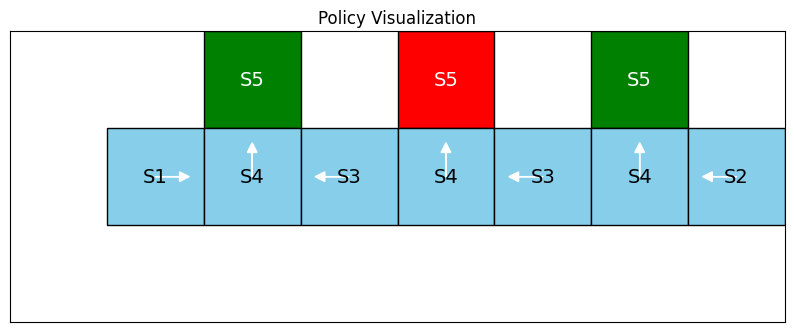

In [651]:
vi_policy = plot_custom_grid(vi_policy.select_action, state_positions, states, actions)

##### Policy iteration

In [656]:
pi_policy = TabularPolicy(default_action="Left")

pi_max_iter = 1000

time_start = time()
pi_iter = PolicyIteration(mdp, pi_policy).policy_iteration(max_iterations=pi_max_iter)
time_end = time()

pi_time = time_end - time_start

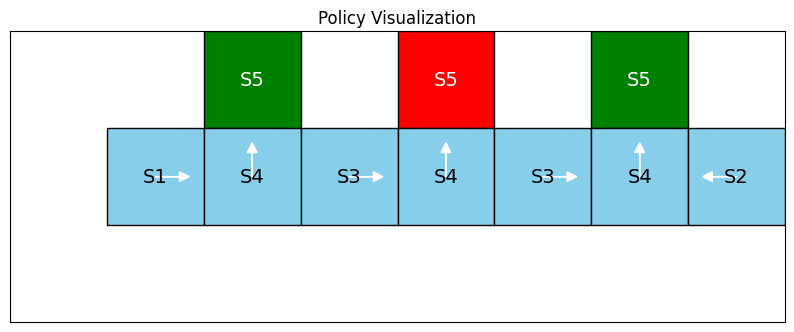

In [657]:
pi_policy = plot_custom_grid(pi_policy.select_action, state_positions, states, actions)

##### Comparison of VI and PI

In [658]:
from tabulate import tabulate

# Assuming `states` is a list of all states and 
# `actions` is a list of possible actions.

# Prepare the table data
table_data = []
for state in states:
    pi_action = pi_policy.get(state, 'N/A')
    vi_action = vi_policy.get(state, 'N/A')
    table_data.append([state, pi_action, vi_action])

# Define the headers
headers = ["State", "Pi Policy Action", "Vi Policy Action"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------+--------------------+--------------------+
| State   | Pi Policy Action   | Vi Policy Action   |
+=========+====================+====================+
| S1      | Right              | Right              |
+---------+--------------------+--------------------+
| S2      | Left               | Left               |
+---------+--------------------+--------------------+
| S3      | Right              | Left               |
+---------+--------------------+--------------------+
| S4      | Up                 | Up                 |
+---------+--------------------+--------------------+
| S5      | Right              | Up                 |
+---------+--------------------+--------------------+


In [662]:
print(f"Policy Iteration: {pi_iter}, Time: {pi_time}")
print(f"Value Iteration: {vi_iter}, Time: {vi_time}")

Policy Iteration: 21, Time: 0.006002902984619141
Value Iteration: 5, Time: 0.0010058879852294922


#### b

Consider scenario 3 in a situation where the robot is aware of its location on the map. Once again, determine the optimal policy using the algorithms.

##### Utils

In [733]:
import matplotlib.pyplot as plt
import numpy as np

# Define the mapping of actions to directions
action_to_vector = {
    "Right": (1, 0),  # (dx, dy) for right
    "Left":  (-1, 0), # (dx, dy) for left
    "Up":    (0, 1),  # (dx, dy) for up
}

# Define grid positions for states
state_positions = {
    "S1": (0, 0), "S2": (1, 0), "S3": (2, 0), "S4": (3, 0), "S5": (4, 0), "S6": (5, 0), "S7": (6, 0),
    "T1": (1, 1), "T3": (3, 1), "T5": (5, 1)
}

# Create a function to plot the custom grid with actions
def plot_custom_grid(policy: callable, state_positions, states, actions):
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Set bounds of the plot (limits)
    ax.set_xlim(-1, 7)
    ax.set_ylim(-1, 2)

    # Plot the top row terminal S5T states
    for state, position in state_positions.items():
        if "T" in state:
            # Color the middle terminal state red, others green
            color = 'red' if state == "T3" else 'green'
            ax.add_patch(plt.Rectangle(position, 1, 1, facecolor=color, edgecolor='black'))
            ax.text(position[0] + 0.5, position[1] + 0.5, "T", color='white', fontsize=14, ha='center', va='center')

    # Plot the bottom row regular states
    bottom_states = {"S1": (0, 0), "S2": (1, 0), "S3": (2, 0), "S4": (3, 0), "S5": (4, 0), "S6": (5, 0), "S7": (6, 0)}
    
    state_actions = {}

    for state in states:
        state_actions[state] = policy(state, actions)

    for state_key, position in bottom_states.items():
        state_name = state_key   # Handle state names (like "S4_2" -> "S4")
        ax.add_patch(plt.Rectangle(position, 1, 1, facecolor='skyblue', edgecolor='black'))
        ax.text(position[0] + 0.5, position[1] + 0.5, state_name, color='black', fontsize=14, ha='center', va='center')

        # Plot the action arrows according to the policy
        action = state_actions[state_name]
        dx, dy = action_to_vector[action]
        
        # Plot the action arrow for the state
        ax.arrow(position[0] + 0.5, position[1] + 0.5, 0.25 * dx, 0.25 * dy, head_width=0.1, head_length=0.1, fc='white', ec='white')

    # Remove ticks and format plot
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title("Policy Visualization")
    plt.grid(False)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    return state_actions

##### MDP

In [708]:
class MDP:
    def __init__(self, states, actions, reward_func, transition_func, discount_factor):
        self.states = states
        self.actions = actions
        self.reward_func = reward_func
        self.transition_func = transition_func
        self.discount_factor = discount_factor

    def get_transitions(self, state, action):
        return self.transition_func[state][action]
    
    def get_reward(self, state, action, new_state):
        return self.reward_func[state][action][new_state]

    def get_states(self):
        return self.states

    def get_actions(self, state):
        return self.actions
    
    def get_discount_factor(self):
        return self.discount_factor

In [709]:
# Define the MDP components
states = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'T1', 'T3', 'T5'] 
actions = ['Up', 'Right', 'Left']
discount_factor = 0.9   # Lambda = 0.9

# Reward function R(s, a) -> `terminal (+1/-1)` and `0` elsewhere (unused)
reward_func = {
    'S1': {'Up': {'S1': 0}, 'Right': {'S2': 0}, 'Left': {'S1': 0}},       
    'S2': {'Up': {'T1': +1}, 'Right': {'S3': 0}, 'Left': {'S1': 0}},       
    'S3': {'Up': {'S3': 0}, 'Right': {'S4': 0}, 'Left': {'S2': 0}},       
    'S4': {'Up': {'T3': -1}, 'Right': {'S5': 0}, 'Left': {'S3': 0}},
    'S5': {'Up': {'S5': 0}, 'Right': {'S6': 0}, 'Left': {'S4': 0}},        
    'S6': {'Up': {'T5': +1}, 'Right': {'S7': 0}, 'Left': {'S5': 0}},
    'S7': {'Up': {'S7': 0}, 'Right': {'S7': 0}, 'Left': {'S6': 0}},
    'T1': {'Up': {'T1': 0}, 'Right': {'T1': 0}, 'Left': {'T1': 0}},
    'T3': {'Up': {'T3': 0}, 'Right': {'T3': 0}, 'Left': {'T3': 0}},
    'T5': {'Up': {'T5': 0}, 'Right': {'T5': 0}, 'Left': {'T5': 0}}
}

# Set the transition probability matrix P(s' | s, a)
# Transitions represented as P[s_current][a] = list of possible (s_next, prob).
transition_func = {
    'S1': {'Up': [('S1', 1)], 'Right': [('S2', 1)], 'Left': [('S1', 1)]},       
    'S2': {'Up': [('T1', 1)], 'Right': [('S3', 1)], 'Left': [('S1', 1)]},       
    'S3': {'Up': [('S3', 1)], 'Right': [('S4', 1)], 'Left': [('S2', 1)]},       
    'S4': {'Up': [('T3', 1)], 'Right': [('S5', 1)], 'Left': [('S3', 1)]},
    'S5': {'Up': [('S5', 1)], 'Right': [('S6', 1)], 'Left': [('S4', 1)]},        
    'S6': {'Up': [('T5', 1)], 'Right': [('S7', 1)], 'Left': [('S5', 1)]},
    'S7': {'Up': [('S7', 1)], 'Right': [('S7', 1)], 'Left': [('S6', 1)]},
    'T1': {'Up': [('T1', 1)], 'Right': [('T1', 1)], 'Left': [('T1', 1)]},
    'T3': {'Up': [('T3', 1)], 'Right': [('T3', 1)], 'Left': [('T3', 1)]},
    'T5': {'Up': [('T5', 1)], 'Right': [('T5', 1)], 'Left': [('T5', 1)]}
}

In [710]:
mdp = MDP(states, actions, reward_func, transition_func, discount_factor)

##### Value iteration

In [742]:
vi_values = TabularValueFunction()

vi_max_iter = 1000

time_start = time()
vi_iter = ValueIteration(mdp, vi_values).value_iteration(max_iterations=vi_max_iter)
time_end = time()

vi_time = time_end - time_start

print(vi_values.get_values(states))

[0.9, 1.0, 0.9, 0.81, 0.9, 1.0, 0.9, 0.0, 0.0, 0.0]


In [743]:
vi_policy = ValuePolicy(mdp, vi_values)

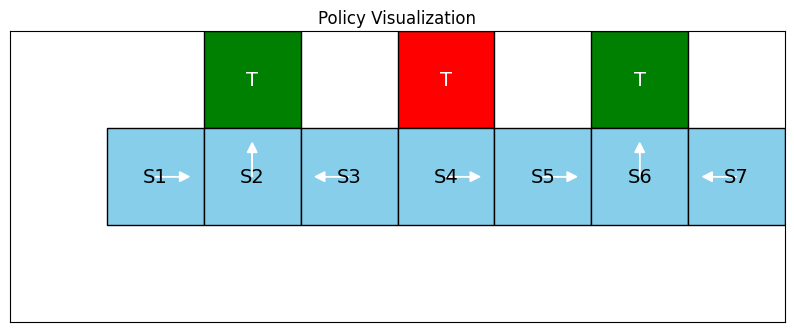

In [744]:
# for state in states:
#     print(f"{state}: {vi_policy.select_action(state, actions)}")

vi_policy = plot_custom_grid(vi_policy.select_action, state_positions, states, actions)

##### Policy iteration

In [745]:
pi_policy = TabularPolicy(default_action="Up")

pi_max_iter = 1000

time_start = time()
pi_iter = PolicyIteration(mdp, pi_policy).policy_iteration(max_iterations=pi_max_iter)
time_end = time()

pi_time = time_end - time_start

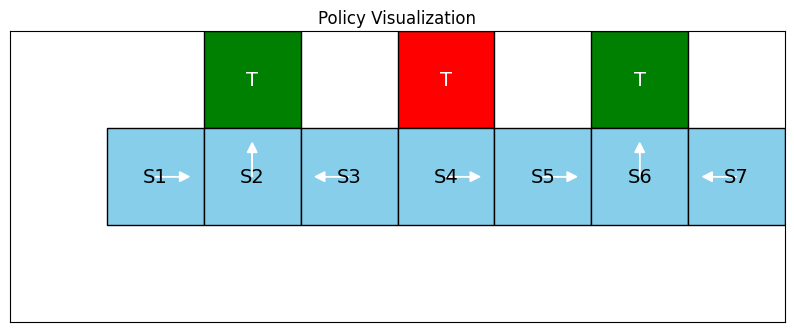

In [ ]:
pi_policy = plot_custom_grid(pi_policy.select_action, state_positions, states, actions)

##### Comparison of PI and VI

In [747]:
from tabulate import tabulate

# Assuming `states` is a list of all states and 
# `actions` is a list of possible actions.

# Prepare the table data
table_data = []
for state in states:
    pi_action = pi_policy.get(state, 'N/A')
    vi_action = vi_policy.get(state, 'N/A')
    table_data.append([state, pi_action, vi_action])

# Define the headers
headers = ["State", "Pi Policy Action", "Vi Policy Action"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------+--------------------+--------------------+
| State   | Pi Policy Action   | Vi Policy Action   |
+=========+====================+====================+
| S1      | Right              | Right              |
+---------+--------------------+--------------------+
| S2      | Up                 | Up                 |
+---------+--------------------+--------------------+
| S3      | Left               | Left               |
+---------+--------------------+--------------------+
| S4      | Right              | Right              |
+---------+--------------------+--------------------+
| S5      | Right              | Right              |
+---------+--------------------+--------------------+
| S6      | Up                 | Up                 |
+---------+--------------------+--------------------+
| S7      | Left               | Left               |
+---------+--------------------+--------------------+
| T1      | Up                 | Left               |
+---------+-----------------

In [748]:
print(f"Policy Iteration: {pi_iter}, Time: {pi_time}")
print(f"Value Iteration: {vi_iter}, Time: {vi_time}")

Policy Iteration: 212, Time: 0.09899711608886719
Value Iteration: 3, Time: 0.0009992122650146484


## Problem 4

In this question, we examine the effect of episode length (Horizon) on the agent’s policy. Consider a robot that is tasked with managing stock shares. (Assume this problem can be represented as an MDP.)

Let $ s $ represent the number of shares the robot currently has (an integer always between [0,10]). At each moment, the robot has two options: to sell (if possible, $ s $ decreases by one unit) or to buy (if possible, $ s $ increases by one unit).

- If $ s > 0 $ and the agent sells, it receives a reward of +1 for the sale, and the stock level changes to $ s - 1 $. If $ s = 0 $, nothing happens.
- If $ s < 9 $ and the agent buys, it receives no reward, and the stock level changes to $ s + 1 $.
- The stock owner wants the inventory to be fully stocked at the end of the day; therefore, if the stock level reaches the maximum value of $ s = 10 $, the agent receives a reward of +100.
- The state $ s = 10 $ is also a terminal state, and the problem ends if it is reached.

The reward function, denoted by $ r(s, a, s') $, is summarized as follows:

- $ r(s, \text{sell}, s - 1) = 1 $ for $ s > 0 $
- $ r(0, \text{sell}, 0) = 0 $
- $ r(s, \text{buy}, s + 1) = 0 $ for $ s < 9 $
- $ r(9, \text{buy}, 10) = 100 $, indicating that moving from $ s = 9 $ to $ s = 10 $ gives a reward of +100, reaching the maximum stock level.

It is assumed that the stock level always starts from $ s = 3 $ at the beginning of the day. We will examine how the agent’s optimal policy changes by setting a limited horizon $H$ for the problem. Recall that the horizon $ H $ refers to a limit on the number of time steps in which the agent can interact with the MDP before the episode ends, regardless of whether a terminal state has been reached. We will analyze the characteristics of the optimal policy (the policy that maximizes the episode’s reward) as the horizon $ H $ changes. (For the finite horizon, the discount factor is $ \gamma = 1 $).

![pics/P4.png](pics/P4.png)

For example, assume $ H = 4 $. The agent can sell for three steps, moving from $ s = 3 $ to $ s = 2 $, then $ s = 1 $, and finally $ s = 0 $, receiving rewards of +1, +1, and +1 for each sell action. In the fourth step, the inventory is empty, so it can either sell or buy, but it will not receive any reward in either case. Then, the problem ends due to the time limit.

### a 
Starting from the initial state $ s = 3 $, is it possible to choose a value of $ H $ such that the optimal policy includes both buying and selling steps during the execution? Explain your answer.

Yes, let’s explore $H = 5$ in detail:

**Setting $H = 5$:**

We begin at $s = 3$ and examine a scenario with 3 sells, followed by 1 buy and then 1 sell:

- **First step (s = 3)**: Sell, move to $s = 2$, and receive a reward of +1.
- **Second step (s = 2)**: Sell, move to $s = 1$, and receive a reward of +1.
- **Third step (s = 1)**: Sell, move to $s = 0$, and receive a reward of +1.
- **Fourth step (s = 0)**: Since there are no more shares to sell, the optimal action is to buy. Buy, move to $s = 1$, and receive no reward.
- **Fifth step (s = 1)**: Sell, return to $s = 0$, and receive a reward of +1.

In this scenario, with a horizon $H = 5$, we obtain 4 units of reward: 1 unit from each of the 4 sell actions. The agent first sells down to $s = 0$, buys back to $s = 1$, and finally sells again.

This sequence contains both **buying** and **selling** steps, thus confirming that it is possible for the agent's optimal policy to include both actions if the horizon $H$ is set to 5.

---

#### **General Analysis of $H$ and Buying/Selling**

- **For $H \leq 4$**:
  At this point, the agent **only sells** to receive immediate rewards without any buying actions, because there isn't enough time or benefit from trying to buy stocks. The reward for selling is immediate, whereas buying does not provide any immediate reward. 

  - For example, with **$H = 4$**:
    - The optimal policy involves the agent selling for the first three steps, moving from $s = 3$ to $s = 0$.
    - At the fourth step (at $s = 0$), the robot can either sell again (which would yield no reward) or buy, but the point is that **the optimal policy would not necessarily contain any buy** since the buy action doesn't lead to an immediate benefit and there's no sufficient time left to capitalize on it. So, you will often just see 3 sells and perhaps some arbitrary choice in the 4th.
  
- **For $H = 5$**:
  With $H = 5$, the agent can start selling, just like $H = 4$, but might add **a single buy step** at the fourth step (after the third sale).

  - Optimal policy for $H = 5$:
    - The first three actions are sells: $s = 3 \to 2 \to 1 \to 0$ with rewards of +1 for each sell.
    - In the fourth step, the agent might buy (because there’s no benefit in selling, as $s = 0$).
    - Finally, selling again in the fifth step yields another reward of +1.
  
  Thus, $H = 5$ allows for a mixture of **1 buy step and 4 sells**, leading to maximal reward accumulation.

- **For $H = 6$**:
  $H = 6$ is similar to $H = 5$. The agent can follow a similar strategy, where first they sell, then buy at one point, and finally sell again to get a reward.

  - Optimal policy for $H = 6$:
    - The agent might sell for three steps (moving from $s = 3 \to s = 0$).
    - Then the agent buys (e.g., at step 4), moves to $s = 1$, sells it back again to stay within the horizon.
    - Additional sells/buys in a similar cycle could lead to a total return of 4-5, depending on the steps chosen.

  Therefore, $H = 6$ contains a **mixture of several buys and sells** where the agent maximizes reward while handling the $H = 6$ steps.

- **For $H = 7$**:
    
  At $H = 7$, the agent no longer sells to maximize rewards. Instead, the optimal policy will switch to buying actions aimed at maximizing the final large reward of 100 at $s = 10$. Since the starting state is $s = 3$, it can take up to 7 steps:
    
  - The agent will **only buy** to increase the stock from $s = 3 \to s = 10$.
  - By the seventh step, the robot will buy enough shares (moving from $s = 3 \to s = 10$) and reach the terminal state at $s = 10$, where it receives the reward of 100.

  Thus, for $H = 7$, **buying only** guarantees the large reward at the terminal state.

- **For $H = 8$**:
    
  The situation is quite similar to $H = 7$. Even though the agent has 8 steps, the optimal trajectory is still to buy until it reaches the maximum stock level of $s = 10$.

  - If the agent spends any actions selling (for small immediate rewards), it sacrifices the future reward of 100 from reaching $s = 10$, so selling is suboptimal.
  - Therefore, the **only optimal policy** in this case is to **buy** in order to maximize future rewards.

  The agent will still follow a pure-buy policy to reach $s = 10$ and get rewarded with 100.

- **For $H \geq 9$**:
    
  For horizons $H \geq 9$, the agent has enough time to maximize the reward not just by stockpiling all the way up to $s = 10$, but also by mixing in intermittent sells to gain additional rewards along the way, before ultimately ensuring it ends at $s = 10$.

  - The agent can use $s \to s - 1$ transitions (selling) to obtain immediate rewards (e.g., +1) at several points and then buy back the shares in order to reach $s = 10$.
  - The idea is to balance between immediate rewards from selling shares and the future reward of 100 for max stock level $s = 10$.

  For example, for $H = 9$, the agent can:
  - Sell for a couple of actions to gain small immediate rewards, then **switch to buying to ensure that the final state is $s = 10$**, and maximize the larger future reward.

  For **$H \geq 9$**, the optimal policy is a **mixture of sells and buys** to balance immediate rewards and ensure reaching $s = 10$.



### b
Starting from the initial state $ s = 3 $, for what values of $ H $ does the optimal policy lead to a fully stocked inventory? In other words, provide a range for $ H $.

*Note 1:* We consider the inventory fully stocked when the buy action is chosen in state $ s = 9 $, causing a transition to $ s = 10 $. This includes the last time step in the horizon as well.

*Note 2:* By performing only buy actions, the agent can reach $ s = 10 $ from $ s = 3 $ in $ H = 7 $ steps.

The answer is $7 \leq H$. Let's see why:

#### $H \leq 6$

- The agent will prefer selling rather than buying, as reaching $s = 10$ is impossible within 6 steps. The agent will maximize the immediate rewards from selling, and the inventory will not become fully stocked.

#### $H = 7$

- Starting at $s = 3$, if $H = 7$, by **only buying**, the agent can reach $s = 10$ on the last step:
  $$s = 3 \to 4 \to 5 \to 6 \to 7 \to 8 \to 9 \to 10.$$
  
  Reaching $s = 10$ gives the agent a reward of +100 in the final step. This is the maximum possible reward for this horizon because selling earlier for a reward of +1 per sale sacrifices the large reward of +100 from reaching $s = 10$. The optimal policy in this case is to **always buy** and reach $s = 10$.

Thus, **for $H = 7$**, the optimal policy leads to a fully stocked inventory, since the agent sacrifices no time for selling and focuses on accumulating the large terminal reward.

#### $H = 8$

- With $H = 8$, the agent can reach $s = 10$ by **only buying**:

  $$s = 3 \to 4 \to 5 \to 6 \to 7 \to 8 \to 9 \to 10.$$
  
  Like in the case of $H = 7$, the agent will receive the large reward of +100 upon reaching $s = 10$. There is one extra step after reaching $s = 10$, but since reaching $s = 10$ ends the episode, no further actions are possible once the maximum state is reached.

  If the agent spends any time selling earlier, they will not collect the large reward of +100 from reaching $s = 10$. Therefore, the optimal policy for $H = 8$ is still to **buy exclusively** and reach $s = 10$, maximizing the final reward.

Thus, **for $H = 8$**, the optimal policy leads to fully stocking the inventory. The agent once again only buys to reach $s = 10$ and get the large reward.

#### $H = 9$ and beyond

- For $H \geq 9$, the agent has even more time. The important decision now is to determine whether earning small rewards by selling before reaching $s = 10$ can provide better total rewards than simply reaching $s = 10$ for the big reward of +100.

- Since the reward from reaching $s = 10$ is **so large** (+100), the optimal strategy will still involve **reaching $s = 10$** within the time limit.

  However, the agent might choose to sell once or twice **early** to gather a small immediate reward (e.g., selling at $s = 3 \to s = 2$) and then buy back to ensure it still reaches $s = 10$. As long as reaching $s = 10$ is still feasible, the agent can mix buying and selling to maximize the total reward.

  One possible policy for $H = 9$ is to sell for 1 step (gaining +1 reward), and then continue buying towards $s = 10$, ensuring that the agent still gets the major reward of +100.

Thus, **for $H \geq 9$**, the optimal policy may include a mix of **some early selling** for immediate rewards followed by **buying to reach $s = 10$**. The agent still values reaching the fully stocked inventory because of the large +100 reward. This means the inventory ends fully stocked, but the agent makes a few sales en route to $s = 10$.

### c
Now, consider the infinite-horizon setting with a discount factor $ \gamma $. In other words, there is no time limit, and the problem only ends if a terminal state is reached. Suppose $ \gamma = 0 $; what action does the optimal policy take when $ s = 3 $? What action does the optimal policy take when $ s = 9 $?

Since $\gamma = 0$, the agent only cares about rewards in the current step and ignores all possible future outcomes. So, **at $s = 3$**, the best action is to **sell** a share because this provides an immediate reward of +1. additionally, **at $s = 9$** the best action is to **buy** a share to reach $s = 10$, which gives the large immediate reward of +100.

#### What does $\gamma$ = 0 mean?

The discount factor $\gamma$ tells us how the agent values **future rewards**. If $\gamma = 0$, the agent **does not care about future rewards at all**; it only cares about the **immediate rewards**. This means the agent will choose actions that maximize the current step's reward without considering what might happen next.

In this scenario, with $\gamma = 0$, **only the immediate reward matters** for the agent at every step. The agent isn't concerned about long-term outcomes, such as reaching the fully stocked inventory $s = 10$ and receiving the +100 reward at the end. Instead, it focuses solely on the action that gives the highest reward in the current step.

#### What happens at $s = 3$?
At $s = 3$, the agent has two options:
1. **Sell**: Selling one share will give the agent an immediate reward of **+1** and move it to state $s = 2$.
2. **Buy**: Buying one share will give the agent **0 immediate reward** and move it to state $s = 4$.

Since $\gamma = 0$, the agent only cares about **immediate reward**, not future rewards. Therefore, the agent will choose the action that gives the best **immediate** return. **Selling** at $s = 3$ provides an immediate reward of **+1**, while buying provides **0 immediate reward**.

Thus, **the optimal action at $s = 3$** is to **sell** a share in order to get the immediate reward of +1.

#### What happens at $s = 9$?
Similarly, at $s = 9$, the agent has two options:
1. **Sell**: Selling one share will give the agent an immediate reward of **+1** and move it to state $s = 8$.
2. **Buy**: Buying one share will move the agent to state $s = 10$, which is the terminal state, and will immediately give a reward of **+100**.

Since $\gamma = 0$ means the agent only cares about **immediate reward**, the choice here is clear: **Buying** in $s = 9$ leads to an immediate reward of **+100**, which is much higher than the alternative of **+1** received from selling.

Thus, **the optimal action at $s = 9$** is to **buy** the last share, transitioning to $s = 10$ and earning the large immediate reward of +100.

### d
In the infinite-horizon setting with a discount factor $ \gamma $, is it possible to choose a constant $ \gamma \in (0, 1] $ such that the optimal policy, starting from $ s = 3 $, never fully stocks the inventory? If so, find a range of $ \gamma $ that meets this condition.

We consider two policies:

1. **Policy for filling the inventory (buying until $s = 10$)**:
    - Starting from $s = 3$, the agent buys until it reaches $s = 10$ to get the large reward of +100.
    - The cumulative discounted reward for reaching $s = 10$ is:
      $$G_{\text{stock}} = 100 \cdot \gamma^6$$
    - This is because the reward of +100 is received after 7 steps of buying (zero rewards along the way), so the total gain is discounted by $\gamma^6$.

2. **Policy for not filling the inventory (selling first, then alternating between buying and selling)**:
    - In this case, the agent first sells down to $s = 0$, collects small rewards of +1, and then alternates between buying and selling to collect additional rewards.
    - The cumulative discounted reward for selling and not restocking the inventory is:
      $$G_{\text{no\_stock}} = 1 + \gamma + \gamma^2 + 0 + \gamma^4 + 0 + \gamma^6 + \cdots$$
    - The important thing to notice here is that rewards are collected every other step, and this forms a geometric series. Therefore, using the summation formula for a geometric series, the total reward from selling and alternating is:
      $$G_{\text{no\_stock}} = \gamma + \frac{1}{1 - \gamma^2}$$

#### Condition for avoiding fully stocking the inventory:
We want to find the values of $\gamma$ such that the reward from not stocking the inventory is larger than the reward from fully stocking the inventory:
$$G_{\text{no\_stock}} > G_{\text{stock}}$$
This results in the inequality:
$$\gamma + \frac{1}{1 - \gamma^2} > 100 \cdot \gamma^6$$
Multiply both sides by $(1 - \gamma^2)$ to eliminate the denominator:
$$(\gamma - \gamma^3) + 1 > 100 \cdot \gamma^6 \cdot (1 - \gamma^2)$$
Next, expand the terms:
$$1 - \gamma^3 + \gamma > 100 \cdot \gamma^6 - 100 \cdot \gamma^8$$
Rearrange the terms to move everything to one side:
$$100 \cdot \gamma^8 - 100 \cdot \gamma^6 - \gamma^3 + \gamma + 1 > 0$$
This is the expression we need to solve.

#### Solving the inequality:

![pics/P4d.png](pics/P4d.png)

The graph shows the function:
$$f(x) = 100 \cdot x^8 - 100 \cdot x^6 - x^3 + x + 1$$
By plotting the graph (as shown in the image), we find that the root of the inequality is approximately:
$$\gamma \approx 0.51554$$
Thus, the range of $\gamma$ such that the optimal policy **never fully stocks the inventory** is:
$$\gamma \in (0, 0.51554)$$

### Implementation

#### a

Based on your answer to part (a) above, choose values of $H$ such that, after obtaining the optimal policy using the VI and PI algorithms, the optimal policy exhibits the following characteristics:  
- The optimal policy only buys.  
- The optimal policy only sells.  
- The optimal policy performs both buying and selling.  

##### MDP

In [ ]:
class MDP:
    def __init__(self, states, actions, reward_func, transition_func, discount_factor):
        self.states = states
        self.actions = actions
        self.reward_func = reward_func
        self.transition_func = transition_func
        self.discount_factor = discount_factor

    def get_transitions(self, state, action):
        return self.transition_func[state][action]
    
    def get_reward(self, state, action, new_state):
        return self.reward_func[state][action][new_state]

    def get_states(self):
        return self.states

    def get_actions(self, state):
        return self.actions
    
    def get_discount_factor(self):
        return self.discount_factor
    
    # Generate a random episode based on the current ε-greedy policy
    def generate_episode(self, start_state, policy, epsilon):
        episode = []
        state = start_state

        while state != 'S10':  # Until we reach the terminal state S10
            action = self.get_action_for_state_epsilon_greedy(state, policy, epsilon)
            transitions = self.get_transitions(state, action)
            new_state, prob = random.choices(transitions, [prob for _, prob in transitions])[0]
            reward = self.get_reward(state, action, new_state)
            episode.append((state, action, reward, new_state))
            state = new_state
        
        return episode

In [707]:
states = ['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10']
actions = ['buy', 'sell']
discount_factor = 0.9   # Lambda = 0.9

# Reward function R(s, a) -> `terminal (+1/-1)` and `0` elsewhere
reward_func = {
    'S0': {'buy': {'S1': 0}, 'sell': {'S0': 0}},
    'S1': {'buy': {'S2': 0}, 'sell': {'S0': 1}},
    'S2': {'buy': {'S3': 0}, 'sell': {'S1': 1}},
    'S3': {'buy': {'S4': 0}, 'sell': {'S2': 1}},
    'S4': {'buy': {'S5': 0}, 'sell': {'S3': 1}},
    'S5': {'buy': {'S6': 0}, 'sell': {'S4': 1}},
    'S6': {'buy': {'S7': 0}, 'sell': {'S5': 1}},
    'S7': {'buy': {'S8': 0}, 'sell': {'S6': 1}},
    'S8': {'buy': {'S9': 0}, 'sell': {'S7': 1}},
    'S9': {'buy': {'S10': 100}, 'sell': {'S8': 1}},
    'S10': {'buy': {'S10': 0}, 'sell': {'S10': 0}}
}

# Set the transition probability matrix P(s' | s, a)
# Transitions represented as P[s_current][a] = list of possible (s_next, prob).
transition_func = {
    'S0': {'buy': [('S1', 1)], 'sell': [('S0', 1)]},
    'S1': {'buy': [('S2', 1)], 'sell': [('S0', 1)]},
    'S2': {'buy': [('S3', 1)], 'sell': [('S1', 1)]},
    'S3': {'buy': [('S4', 1)], 'sell': [('S2', 1)]},
    'S4': {'buy': [('S5', 1)], 'sell': [('S3', 1)]},
    'S5': {'buy': [('S6', 1)], 'sell': [('S4', 1)]},
    'S6': {'buy': [('S7', 1)], 'sell': [('S5', 1)]},
    'S7': {'buy': [('S8', 1)], 'sell': [('S6', 1)]},
    'S8': {'buy': [('S9', 1)], 'sell': [('S7', 1)]},
    'S9': {'buy': [('S10', 1)], 'sell': [('S8', 1)]},
    'S10': {'buy': [('S10', 1)], 'sell': [('S10', 1)]}
}

# Starting state is S3
start_state = 'S3'

In [677]:
mdp = MDP(states, actions, reward_func, transition_func, discount_factor)

##### M.C. Value Iteration

In [26]:
def monte_carlo_value_iteration(mdp, start_state, num_episodes, horizon):
    # Initialize value function V(s) for all states (initially set to 0)
    V = {state: 0.0 for state in mdp.get_states()}
    
    # Initialize returns list for all states to keep track of all values observed
    returns = {state: [] for state in mdp.get_states()}
    
    # Monte Carlo simulation for a fixed number of episodes
    for episode in range(num_episodes):
        # Generate an episode starting from the start_state
        state = start_state
        episode_history = []  # To store the (state, action, reward) for each transition in episode
        
        # Simulate an episode of up to 'horizon'
        for t in range(horizon):
            # Randomly select an action -- assuming exploring start (radom policy)
            action = random.choice(mdp.get_actions(state))
            
            # Get transitions and rewards for that action in the current state
            transitions = mdp.get_transitions(state, action)
            new_state, prob = transitions[0]  # Assuming deterministic with prob = 1 for our model
            
            reward = mdp.get_reward(state, action, new_state)
            
            # Append this step to the episode history
            episode_history.append((state, action, reward))
            
            # Move to the next state
            state = new_state
            
            # If we encounter terminal state S10, break
            if state == 'S10':
                break

        first_visited_states = set()  # Track visited states in this episode

        for (state, action, reward) in episode_history:
            # Skip if we have already visited this state in the episode
            if state in first_visited_states:
                continue
            first_visited_states.add(state)
        
        # Now we have the entire episode, calculate the return and update values
        G = 0  # Cumulative discounted reward
        for step in reversed(episode_history):
            state, action, reward = step
            G = reward + mdp.get_discount_factor() * G  # Update G with rewards and discount

            if state not in first_visited_states:  # First-visit condition
                returns[state].append(G)  # Keep track of returns for this state

                # Update value function by averaging all returns for the state
                V[state] = np.mean(returns[state])
    
    return V

def compute_optimal_policy(mdp, value_function):
    policy = {}
    
    # For each state, determine the best action based on the value function
    for state in mdp.get_states():
        best_action = None
        best_value = float('-inf')
        
        # Iterate over all possible actions in the current state
        for action in mdp.get_actions(state):
            action_value = 0  # Expected value of taking this action
            
            # Loop over possible transitions for action in this state
            transitions = mdp.get_transitions(state, action)
            for new_state, prob in transitions:
                reward = mdp.get_reward(state, action, new_state)
                action_value += prob * (reward + mdp.get_discount_factor() * value_function[new_state])
            
            # Track the action that gives the highest expected return
            if action_value > best_value:
                best_value = action_value
                best_action = action
        
        # Save the best action for this state
        policy[state] = best_action
    
    return policy

In [33]:
# Horizon (number of steps per episode simulation)
horizon = 7

# Number of episodes to simulate
num_episodes = 5000

# Starting state is S3
start_state = 'S3'

# Run Monte Carlo Value Iteration
values = monte_carlo_value_iteration(mdp, start_state, num_episodes, horizon)

# Print Value function
print("Estimated Value Function V(s) after Monte Carlo iterations:")
for state, value in values.items():
    print(f"V({state}) = {value:.2f}")

# Compute optimal policy based on value function
optimal_policy = compute_optimal_policy(mdp, values)

# Print the optimal policy for each state
print("Optimal Policy for each state:")
for state, action in optimal_policy.items():
    print(f"State {state}: Take action '{action}'")

Estimated Value Function V(s) after Monte Carlo iterations:
V(S0) = 0.00
V(S1) = 0.00
V(S2) = 0.00
V(S3) = 0.00
V(S4) = 0.00
V(S5) = 0.00
V(S6) = 0.00
V(S7) = 0.00
V(S8) = 0.00
V(S9) = 0.00
V(S10) = 0.00
Optimal Policy for each state:
State S0: Take action 'buy'
State S1: Take action 'sell'
State S2: Take action 'sell'
State S3: Take action 'sell'
State S4: Take action 'sell'
State S5: Take action 'sell'
State S6: Take action 'sell'
State S7: Take action 'sell'
State S8: Take action 'sell'
State S9: Take action 'buy'
State S10: Take action 'buy'


##### M.C. Policy Iteration

In [117]:
def monte_carlo_policy_evaluation(mdp, policy, num_episodes, start_state, horizon, epsilon=0.1):
    """
    Runs Monte Carlo policy evaluation for a fixed policy and returns the updated value function.
    """
    V = {state: 0.0 for state in mdp.get_states()}  # Initialize value function
    returns = {state: [] for state in mdp.get_states()}  # Track the returns seen
    
    for episode in range(num_episodes):
        state = random.choice(mdp.get_states())  # Random starting state (could be set as needed)
        # state = start_state  # Fixed starting state for all episodes
        
        episode_history = []  # To store the (state, action, reward) for each transition in episode

        # Simulate an episode according to the current policy
        for t in range(horizon):
            # action = policy[state]  # Always follow the given policy
            # action = random.choice(mdp.get_actions(state))

            if random.random() < epsilon:
                # Exploration: Choose a random action
                action = random.choice(mdp.get_actions(state))
            else:
                # Exploitation: Follow the given policy
                action = policy[state]
            
            transitions = mdp.get_transitions(state, action)
            new_state, prob = transitions[0]  # Assuming deterministic transitions
            
            reward = mdp.get_reward(state, action, new_state)
            episode_history.append((state, action, reward))  # Log the (state, action, reward)
            
            state = new_state
            if state == 'S10':  # Terminal state
                break
        
        # Calculate returns in a backward manner
        G = 0  # Start with zero return
        i = 0

        # for step in reversed(episode_history):
        for step in episode_history[::-1]:
            state, action, reward = step
            G = reward + mdp.get_discount_factor() * G  # Update return G

            if state not in episode_history[::-1][i+1:]:  # First-visit condition
                returns[state].append(G)  # Append the new return for this state
                V[state] = np.mean(returns[state])  # Update the value function via returns averaging

            i += 1
    
    return V

def monte_carlo_policy_improvement(mdp, value_function):
    """
    Performs policy improvement based on the given value function.
    """
    policy = {}
    
    # Iterate over states to create the improved policy
    for state in mdp.get_states():
        best_action = None
        best_value = float('-inf')
        
        for action in mdp.get_actions(state):
            action_value = 0
            
            # Calculate the expected value of taking this action in this state
            transitions = mdp.get_transitions(state, action)
            for new_state, prob in transitions:
                reward = mdp.get_reward(state, action, new_state)
                action_value += prob * (reward + mdp.get_discount_factor() * value_function[new_state])
            
            if action_value > best_value:
                best_value = action_value
                best_action = action
        
        policy[state] = best_action
    
    return policy

def monte_carlo_policy_iteration(mdp, num_episodes, start_state, horizon):
    """
    Monte Carlo Policy Iteration: iteratively performs policy evaluation and improvement.
    """
    # Initialize the policy randomly -- we start with a random policy
    policy = {state: random.choice(mdp.get_actions(state)) for state in mdp.get_states()}
    
    is_policy_stable = False
    iteration = 0
    
    while not is_policy_stable:
        iteration += 1
        # print(f"\nPolicy Iteration {iteration}")
        
        # Step 1: Policy Evaluation -> Estimate value function for the current policy
        value_function = monte_carlo_policy_evaluation(mdp, policy, num_episodes, start_state, horizon)
        # print("Value Function:", value_function)
        
        # Step 2: Policy Improvement -> Improve the policy based on the current value function
        new_policy = monte_carlo_policy_improvement(mdp, value_function)
        # print("Policy:", new_policy)

        # Print final optimal policy and value function after convergence
        # for state, action in policy.items():
        #     print(f"{state}: '{action}'", end=', ')
        # print()

        # for state, value in value_function.items():
        #     print(f"{state} = {value:.2f}", end=', ')
        # print()

        # Check if the policy has stabilized (i.e., no changes from the old policy)
        if new_policy == policy:
            is_policy_stable = True
        else:
            policy = new_policy  # Update the policy and continue
    
    return policy, value_function

In [119]:
# Horizon (number of steps per episode simulation)
horizon = 5

# Number of episodes to evaluate the policy
num_episodes = 500  # Feel free to adjust this number for deeper training

# Perform Monte Carlo Policy Iteration
optimal_policy, optimal_value_function = monte_carlo_policy_iteration(mdp, num_episodes, start_state, horizon)

# Print final optimal policy and value function after convergence
print("\nOptimal Policy after Policy Iteration:")
for state, action in optimal_policy.items():
    print(f"State {state}: Take action '{action}'")

print("\nOptimal Value Function after Policy Iteration:")
for state, value in optimal_value_function.items():
    print(f"V({state}) = {value:.2f}")

KeyboardInterrupt: 

##### Finite Value Iteration

In [123]:
def finite_horizon_value_iteration_with_policy(mdp, T):
    states = mdp.get_states()
    actions = mdp.actions  # Same actions for all states
    
    # Initialize value functions for each time step t (V_t(s))
    V = {t: {s: 0 for s in states} for t in range(T + 1)}  # V_T = 0 is terminal condition
    policy = {t: {s: None for s in states} for t in range(T)}  # Initialize policy for each time t
    
    # Step backward from t = T-1 to t = 0
    for t in range(T - 1, -1, -1):
        for state in states:
            # Skip terminal state S10
            if state == 'S10':
                continue
            
            best_action = None
            max_action_value = float('-inf')
            
            # Loop through all actions
            for action in actions:
                expected_value = 0
                transitions = mdp.get_transitions(state, action)
                
                # Evaluate each transition based on next state's value function at time t+1
                for next_state, prob in transitions:
                    reward = mdp.get_reward(state, action, next_state)
                    expected_value += prob * (reward + V[t + 1][next_state])
                
                # Find the best action for this state at time t
                if expected_value > max_action_value:
                    max_action_value = expected_value
                    best_action = action
            
            # Update value function and policy
            V[t][state] = max_action_value
            policy[t][state] = best_action
    
    return V, policy

# Finite horizon example with T = 5
T = 10
V_finite, policy_finite = finite_horizon_value_iteration_with_policy(mdp, T)

print("Finite Horizon Value Function and Policy:")
for t in range(T + 1):
    print(f"Time step {t}:")
    for s in V_finite[t]:
        action = policy_finite[t].get(s, '-') if t < T else '-'
        print(f"  {s}: Value = {V_finite[t][s]:.2f}, Best Action = {action}")
    print("------")

Finite Horizon Value Function and Policy:
Time step 0:
  S0: Value = 100.00, Best Action = buy
  S1: Value = 100.00, Best Action = buy
  S2: Value = 101.00, Best Action = buy
  S3: Value = 101.00, Best Action = buy
  S4: Value = 102.00, Best Action = buy
  S5: Value = 102.00, Best Action = buy
  S6: Value = 103.00, Best Action = buy
  S7: Value = 103.00, Best Action = buy
  S8: Value = 104.00, Best Action = buy
  S9: Value = 104.00, Best Action = sell
  S10: Value = 0.00, Best Action = None
------
Time step 1:
  S0: Value = 4.00, Best Action = buy
  S1: Value = 100.00, Best Action = buy
  S2: Value = 100.00, Best Action = buy
  S3: Value = 101.00, Best Action = buy
  S4: Value = 101.00, Best Action = buy
  S5: Value = 102.00, Best Action = buy
  S6: Value = 102.00, Best Action = buy
  S7: Value = 103.00, Best Action = buy
  S8: Value = 103.00, Best Action = buy
  S9: Value = 104.00, Best Action = sell
  S10: Value = 0.00, Best Action = None
------
Time step 2:
  S0: Value = 4.00, Best 

In [ ]:
import numpy as np

# Finite Horizon Value Iteration
def finite_horizon_value_iteration(mdp, start_state, horizon):
    states = mdp.get_states()
    actions = mdp.get_actions(None) # Actions don't differ per state in this case
    discount_factor = mdp.get_discount_factor()
    
    # Initialize value functions, one for each time step (horizon)
    V = [{} for _ in range(horizon + 1)]
    for h in range(horizon + 1):
        for state in states:
            V[h][state] = 0
    
    # Iterating backwards from the horizon to step 0
    for h in range(horizon - 1, -1, -1):
        for state in states:
            V[h][state] = max(
                sum(prob * (mdp.get_reward(state, action, next_state) + discount_factor * V[h+1][next_state])
                    for next_state, prob in mdp.get_transitions(state, action))
                for action in actions
            )
    
    # Return the computed values and optimal actions for the start state
    pi = []
    for h in range(horizon):
        action_values = {}
        for action in actions:
            action_values[action] = sum(
                prob * (mdp.get_reward(start_state, action, next_state) + discount_factor * V[h+1][next_state])
                for next_state, prob in mdp.get_transitions(start_state, action)
            )
        optimal_action = max(action_values, key=action_values.get)
        pi.append(optimal_action)
    return V[0][start_state], pi

discount_factor = 0.1
start_state = 'S3'

# Initialize the MDP
mdp = MDP(states, actions, reward_func, transition_func, discount_factor)

# Solve for finite horizon solution
horizon = 5
value, policy = finite_horizon_value_iteration(mdp, start_state, horizon)
print(f"Finite Horizon (Horizon: {horizon}) - Start State: {start_state}")
print(f"Optimal Value: {value}")
print(f"Optimal Policy: {policy}")

Finite Horizon (Horizon: 5) - Start State: S3
Optimal Value: 1.1101
Optimal Policy: ['sell', 'sell', 'sell', 'sell', 'sell']

Infinite Horizon - Start State: S3
Optimal Value Function: {'S0': 0.10101, 'S1': 1.010101, 'S2': 1.10101, 'S3': 1.110101, 'S4': 1.11101, 'S5': 1.1111010000000001, 'S6': 1.11111, 'S7': 1.111111, 'S8': 10.0, 'S9': 100.0, 'S10': 0.0}
Optimal Policy: {'S0': 'buy', 'S1': 'sell', 'S2': 'sell', 'S3': 'sell', 'S4': 'sell', 'S5': 'sell', 'S6': 'sell', 'S7': 'sell', 'S8': 'buy', 'S9': 'buy', 'S10': 'buy'}


#### b

In the infinite-horizon setting, obtain the optimal policy for $\lambda = 0$, and compare it with your answer in part (g) above.

##### Infinite Horizon Value Iteration

In [682]:
# Infinite Horizon Value Iteration
def infinite_horizon_value_iteration(mdp, epsilon=1e-5):
    states = mdp.get_states()
    actions = mdp.get_actions(None)
    discount_factor = mdp.get_discount_factor()
    
    # Initialize value function arbitrarily
    V = {state: 0 for state in states}
    
    while True:
        delta = 0
        new_V = V.copy()
        
        for state in states:
            max_value = max(
                sum(prob * (mdp.get_reward(state, action, next_state) + discount_factor * V[next_state])
                    for next_state, prob in mdp.get_transitions(state, action))
                for action in actions
            )
            new_V[state] = max_value
            delta = max(delta, abs(V[state] - new_V[state]))
        
        V = new_V
        
        # Check for convergence
        if delta < epsilon:
            break
    
    # Once we've converged, we can extract the optimal policy
    policy = {}
    for state in states:
        action_values = {}
        for action in actions:
            action_values[action] = sum(
                prob * (mdp.get_reward(state, action, next_state) + discount_factor * V[next_state])
                for next_state, prob in mdp.get_transitions(state, action)
            )
        policy[state] = max(action_values, key=action_values.get)
    
    return V, policy

##### Infinite Horizon Policy Iteration

In [695]:
def infinite_horizon_policy_iteration(mdp, epsilon=1e-5):
    states = mdp.get_states()
    actions = mdp.get_actions(None)
    discount_factor = mdp.get_discount_factor()
    
    # Step 1: Initialize to a random policy
    policy = {state: actions[0] for state in states}
    
    # Step 2: Initialize value function arbitrarily
    V = {state: 0 for state in states}
    
    def policy_evaluation(policy, V):
        """
        Evaluate the given policy by solving V(s) = sum over next states[T(s, pi(s), s') * (R(s, pi(s), s') + γ * V(s'))].
        The function performs iterative evaluation until V converges.
        """
        while True:
            delta = 0
            new_V = V.copy()
            
            for state in states:
                action = policy[state]
                new_V[state] = sum(
                    prob * (mdp.get_reward(state, action, next_state) + discount_factor * V[next_state])
                    for next_state, prob in mdp.get_transitions(state, action)
                )
                delta = max(delta, abs(V[state] - new_V[state]))
            
            V = new_V
            
            # Check for convergence
            if delta < epsilon:
                break
        
        return V
    
    while True:
        # Step 3: Policy Evaluation -> Compute V given current policy
        V = policy_evaluation(policy, V)
        
        policy_stable = True
        
        # Step 4: Policy Improvement -> Greedily improve the policy
        for state in states:
            # Find the best action according to the current value function V
            old_action = policy[state]
            action_values = {}
            
            for action in actions:
                action_values[action] = sum(
                    prob * (mdp.get_reward(state, action, next_state) + discount_factor * V[next_state])
                    for next_state, prob in mdp.get_transitions(state, action)
                )
            
            # Choose the action that gives maximum value
            best_action = max(action_values, key=action_values.get)
            policy[state] = best_action
            
            # If the policy did change, we're not yet stable
            if old_action != best_action:
                policy_stable = False
        
        # Step 5: Check if the policy is stable and terminate if it is
        if policy_stable:
            break

    return V, policy

##### Run

In [700]:
# Initialize the MDP
mdp = MDP(states, actions, reward_func, transition_func, discount_factor=0)

In [701]:
# Solve for infinite horizon solution
value_vi, policy_vi = infinite_horizon_value_iteration(mdp)
value_pi, policy_pi = infinite_horizon_policy_iteration(mdp)

In [702]:
from tabulate import tabulate

# Prepare the table data
table_data = []
for state in states:
    action_vi = policy_vi.get(state, 'N/A')
    action_pi = policy_pi.get(state, 'N/A')
    table_data.append([state, action_vi, action_pi])

# Define the headers
headers = ["State", "VI (0)", "PI (0)"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------+----------+----------+
| State   | VI (0)   | PI (0)   |
+=========+==========+==========+
| S0      | buy      | buy      |
+---------+----------+----------+
| S1      | sell     | sell     |
+---------+----------+----------+
| S2      | sell     | sell     |
+---------+----------+----------+
| S3      | sell     | sell     |
+---------+----------+----------+
| S4      | sell     | sell     |
+---------+----------+----------+
| S5      | sell     | sell     |
+---------+----------+----------+
| S6      | sell     | sell     |
+---------+----------+----------+
| S7      | sell     | sell     |
+---------+----------+----------+
| S8      | sell     | sell     |
+---------+----------+----------+
| S9      | buy      | buy      |
+---------+----------+----------+
| S10     | buy      | buy      |
+---------+----------+----------+


#### c

In the infinite-horizon setting, obtain the optimal policy separately for $\lambda = 0.1$ and $\lambda = 0.9$, and compare them with each other.

##### Infinite Horizon Value Iteration

In [704]:
# Initialize the MDP
mdp_1 = MDP(states, actions, reward_func, transition_func, discount_factor=0.1)
mdp_9 = MDP(states, actions, reward_func, transition_func, discount_factor=0.9)

In [705]:
# Solve for infinite horizon solution
value_vi_1, policy_vi_1 = infinite_horizon_value_iteration(mdp_1)
value_pi_1, policy_pi_1 = infinite_horizon_policy_iteration(mdp_1)
value_vi_9, policy_vi_9 = infinite_horizon_value_iteration(mdp_9)
value_pi_9, policy_pi_9 = infinite_horizon_policy_iteration(mdp_9)

In [706]:
from tabulate import tabulate

# Prepare the table data
table_data = []
for state in states:
    action_vi_1 = policy_vi_1.get(state, 'N/A')
    action_pi_1 = policy_pi_1.get(state, 'N/A')
    action_vi_9 = policy_vi_9.get(state, 'N/A')
    action_pi_9 = policy_pi_9.get(state, 'N/A')
    table_data.append([state, action_vi_1, action_pi_1, action_vi_9, action_pi_9])

# Define the headers
headers = ["State", "VI (0.1)", "PI (0.9)", " VI (0.1)", "PI (0.9)"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------+------------+------------+-------------+------------+
| State   | VI (0.1)   | PI (0.9)   |  VI (0.1)   | PI (0.9)   |
+=========+============+============+=============+============+
| S0      | buy        | buy        | buy         | buy        |
+---------+------------+------------+-------------+------------+
| S1      | sell       | sell       | buy         | buy        |
+---------+------------+------------+-------------+------------+
| S2      | sell       | sell       | buy         | buy        |
+---------+------------+------------+-------------+------------+
| S3      | sell       | sell       | buy         | buy        |
+---------+------------+------------+-------------+------------+
| S4      | sell       | sell       | buy         | buy        |
+---------+------------+------------+-------------+------------+
| S5      | sell       | sell       | buy         | buy        |
+---------+------------+------------+-------------+------------+
| S6      | sell       | 